Kode Program UAS Topik Pengenalan Pola 
Dosen: Ibu Dr. Yeni Herdiyeni
Mahasiwa: Cholid Mawardi
1. Jelaskan variabel yang digunakan pada dataset berikut ini dengan menggunakan
statistika descriptif (lakukan Exploratory Data Analysis – EDA)
2. Analisis data dengan menggunakan algoritme PCA
3. Cluster dan analisis data menggunakan algoritme EM

In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import seaborn as sns

Import Dataset

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.describe()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Analisis EDA

In [6]:
#Lakukan Expolatory Data
#Pertanyaan EDA yang saya ambil

# 1. Berasal dari Region mana? 
#2. Apakah pelanggan baru atau yang kembali menghabiskan waktu lebih lama di situs web?
#3. Hari spesial apa yang menarik lebih banyak pengguna baru?

Text(0.5, 1.0, 'Data Correlation')

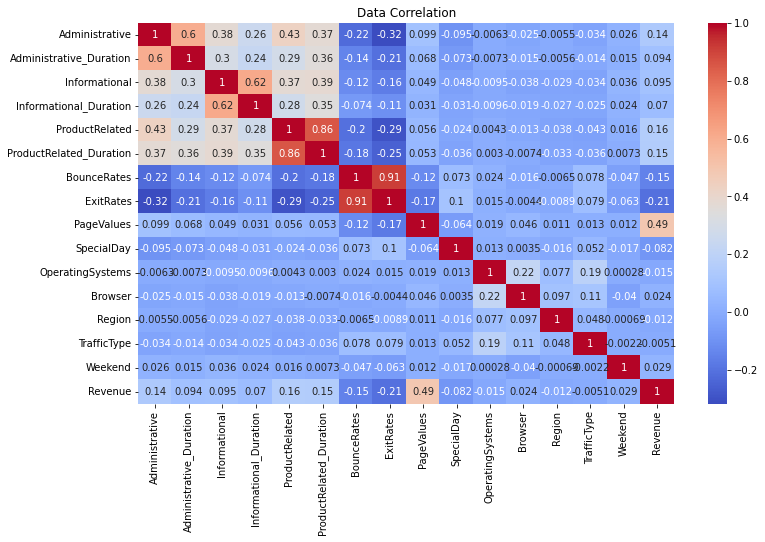

In [7]:
plt.figure(figsize = (12,7))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')
plt.title('Data Correlation')

Analisis Data berdasarkan pertanyaan

Text(0, 0.5, 'Number of Visitors')

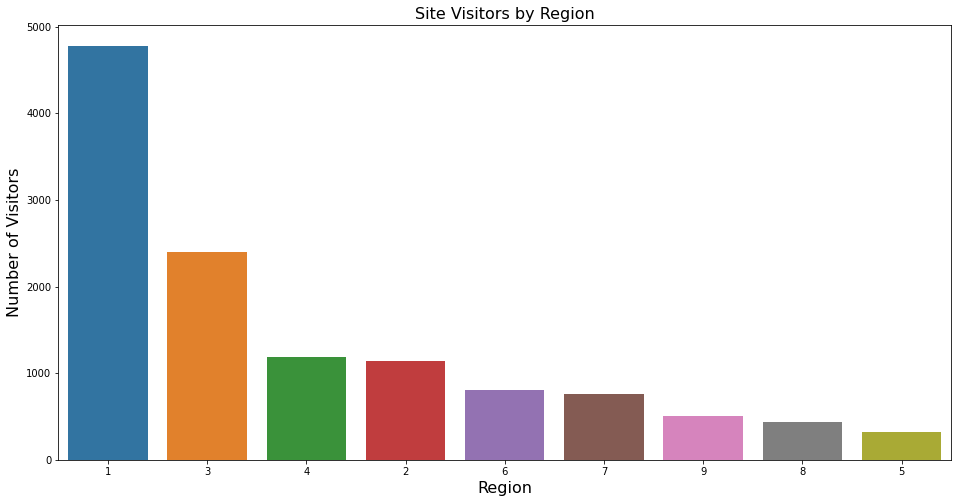

In [8]:
# 1. Berasal dari Region mana? 
plt.figure(figsize = (16,8))
sns.countplot(x = "Region", data = df, 
              order = df['Region'].value_counts().index)
plt.title("Site Visitors by Region", fontsize = 16)
plt.xlabel("Region", fontsize = 16)
plt.ylabel("Number of Visitors", fontsize = 16)

In [9]:
#2. Apakah pelanggan baru atau yang kembali menghabiskan waktu lebih lama di dalam website berdasarka total visitor?
#Saya Ambil hanya beberapa Columns saja ( "Administrative_Duration", "Informational_Duration", 'ProductRelated_Duration")
dur = df[['Administrative_Duration', 
          'Informational_Duration', 
          'ProductRelated_Duration']].sum(axis = 1)

In [10]:
site_duration = pd.DataFrame({"VisitorType": df['VisitorType'],
                           "TotalDuration": dur
                           })

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(10.0, 10000.0)

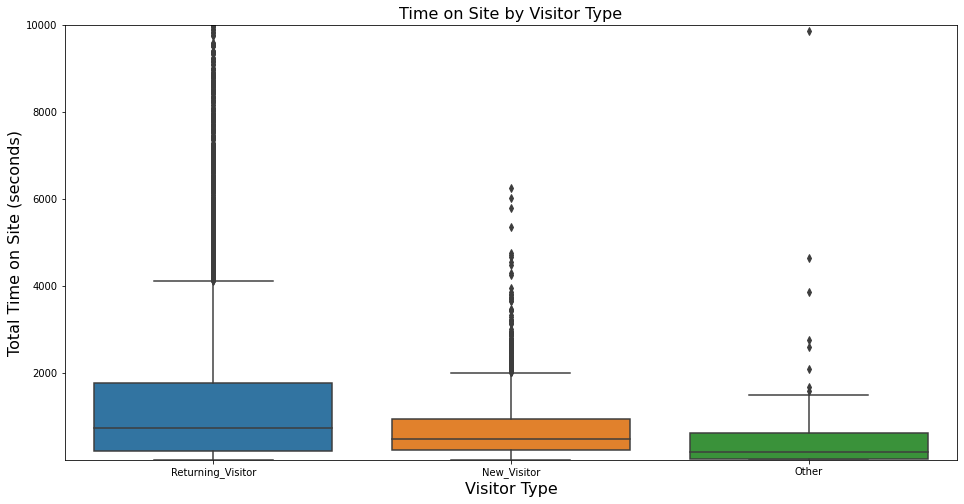

In [11]:
plt.figure(figsize = (16,8))
sns.boxplot('VisitorType', 'TotalDuration', data = site_duration)
plt.title("Time on Site by Visitor Type", fontsize = 16)
plt.xlabel("Visitor Type", fontsize = 16)
plt.ylabel("Total Time on Site (seconds)", fontsize = 16)
plt.ylim(10, 10000)

In [12]:
#3. Hari spesial apa yang menarik lebih banyak pengguna baru?
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [13]:
## closeness to special days in may? 
np.average(df.loc[df['Month'] == 'May', 'SpecialDay'])

0.21236623067776458

In [14]:
np.average(df.loc[df['Month'] == 'Mar', 'SpecialDay'])

0.0

In [15]:
np.average(df.loc[df['Month'] == 'Nov', 'SpecialDay'])

0.0

In [16]:
np.average(df.loc[df['Month'] == 'Dec', 'SpecialDay'])

0.0

In [17]:
df['SpecialDay'].unique()

array([0. , 0.4, 0.8, 1. , 0.2, 0.6])

In [18]:
df.loc[df['SpecialDay'] > 0, 'Month'].unique()

array(['Feb', 'May'], dtype=object)

In [19]:
#Ini menunjukkan bahwa HANYA bulan Februari dan Mei yang "mendekati hari spesial" yang sepertinya salah 
#karena kita tahu ada hari spesial (misalnya Natal, Hari Ayah) yang terjadi pada hari lain 
#Ini menunjukkan kepada  bahwa dalam hal ini Data "Hari Spesial" yang dikumpulkan perusahaan ini bisa lebih informatif 
#jika Anda sekarang menganggap apa yang mereka anggap sebagai "hari spesial", tetapi apa adanya, itu tidak terlalu berguna

In [20]:
#Analisis Menggunakan PCA
df2=df.copy()
df_copy=df2.copy()
df_copy.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [21]:
#Converting numeric to categorical
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [22]:
df_final = df_copy.drop(['Month','OperatingSystems','Browser','TrafficType'],axis=1)
df_final.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Region,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,1,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,9,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,1,Returning_Visitor,True,False


In [23]:
df_final.drop('VisitorType',axis=1,inplace=True)
df_final.drop('Region',axis=1,inplace=True)
df_final.shape

(12330, 12)

In [24]:
df_final.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,True,False


Analisis data dengan menggunakan algoritme PCA 


In [25]:
#PCA
X=df_final.drop(columns=['Revenue'],axis=1)
y=df_final['Revenue']

Standarisasi Data

In [26]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
Xs_pca=ss.fit_transform(X)

In [27]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(Xs_pca)

Principal Components Weights

In [28]:
# Principal Components Weights (Eigenvectors)
df_pca_loadings = pd.DataFrame(pca.components_)
df_pca_loadings.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.382057,0.328796,0.347481,0.295604,0.411004,0.412842,-0.278843,-0.325079,0.094025,-0.071165,0.033226
1,0.053743,0.108428,0.280507,0.303507,0.150913,0.192425,0.608097,0.578966,-0.186765,0.103087,-0.065278
2,-0.221594,-0.280441,-0.193485,-0.192810,0.408622,0.375590,-0.109779,-0.079253,-0.332431,0.562612,-0.210287
3,-0.294023,-0.350702,0.360227,0.456068,-0.129507,-0.113630,-0.156838,-0.111421,-0.149905,0.232561,0.556367
4,-0.179956,-0.211410,0.276634,0.363358,-0.157358,-0.128405,-0.120578,-0.086603,0.203702,0.036542,-0.779903


In [29]:
pca.explained_variance_ratio_

array([0.30936709, 0.15255384, 0.09767877, 0.09360569, 0.08856435,
       0.08545211, 0.08424176, 0.03835489, 0.03196799, 0.01116731,
       0.0070462 ])

Covariance Matrix

In [30]:
Xc=Xs_pca.astype(float)
cov_matrix = np.cov(X_pca.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 3.40331401e+00  2.06754162e-16  3.24377109e-16 -1.55133722e-16
  -9.04819608e-17  2.83260406e-16 -2.76632747e-17 -4.35120258e-16
  -1.54417264e-16  8.86089266e-18  2.89070864e-17]
 [ 2.06754162e-16  1.67822830e+00  5.04278444e-16  1.77217853e-16
  -2.88159111e-18  7.24720164e-17 -1.65115171e-16  2.45799722e-16
   2.79514338e-17 -1.75705018e-16 -2.27645698e-17]
 [ 3.24377109e-16  5.04278444e-16  1.07455365e+00  6.64206751e-17
  -2.87726872e-16 -3.15246067e-16  1.41774283e-16  6.98785844e-17
   1.39036771e-17 -6.86381495e-17 -2.37731267e-18]
 [-1.55133722e-16  1.77217853e-16  6.64206751e-17  1.02974615e+00
  -2.20729879e-16 -5.74877426e-17  1.11805735e-16  2.91617020e-16
  -1.15551803e-16 -6.19361989e-17  2.61864592e-17]
 [-9.04819608e-17 -2.88159111e-18 -2.87726872e-16 -2.20729879e-16
   9.74286865e-01  6.68889336e-17  3.36569842e-16  2.09635753e-16
  -1.47681544e-17 -3.24899398e-17  2.19721322e-17]
 [ 2.83260406e-16  7.24720164e-17 -3.15246067e-16 -5.74877426e-

Nilai EigenVector dan EigenValue

In [31]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 1.00000000e+00 -1.19851531e-16  8.69177065e-18  2.70110983e-18
   5.06014426e-17  1.45946117e-16 -1.39291752e-16 -6.53588735e-17
  -3.72502881e-17 -1.14993902e-16  1.11699524e-17]
 [ 0.00000000e+00  1.00000000e+00  7.65268733e-18 -8.32905292e-17
   2.30238965e-16  7.93324467e-16 -1.20590799e-15  2.34729921e-16
  -6.49546741e-17 -2.17748917e-16  2.43642531e-16]
 [ 0.00000000e+00  7.90709626e-16  1.42432835e-16 -8.48562682e-17
  -1.63609464e-16 -5.48918834e-17  1.00000000e+00  2.16950810e-15
  -1.64740639e-15  3.49999359e-15 -5.34995363e-16]
 [ 0.00000000e+00  2.83205911e-16 -4.22045969e-17  2.36762194e-16
  -1.13571437e-16 -4.26477157e-16  5.08274030e-16 -1.00000000e+00
  -5.83754779e-15 -2.78593840e-16  1.38813314e-15]
 [ 0.00000000e+00 -3.24350207e-17 -4.42481322e-17  2.68544356e-17
   9.49742153e-17 -4.70206028e-16 -2.19838892e-15  5.51168562e-15
  -1.00000000e+00  3.37852655e-15 -1.13528471e-14]
 [ 0.00000000e+00  8.97280358e-17  6.56022700e-18 -1.29428703e-17
 

In [32]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [33]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 30.93670901  46.1920926   55.95996991  65.32053929  74.17697426
  82.72218497  91.14636132  94.98184983  98.17864904  99.29537973
 100.        ]


Visualisasi Statistical Data Menggunakan Seaborn

In [34]:
sns.set_style(style='whitegrid', rc=None)

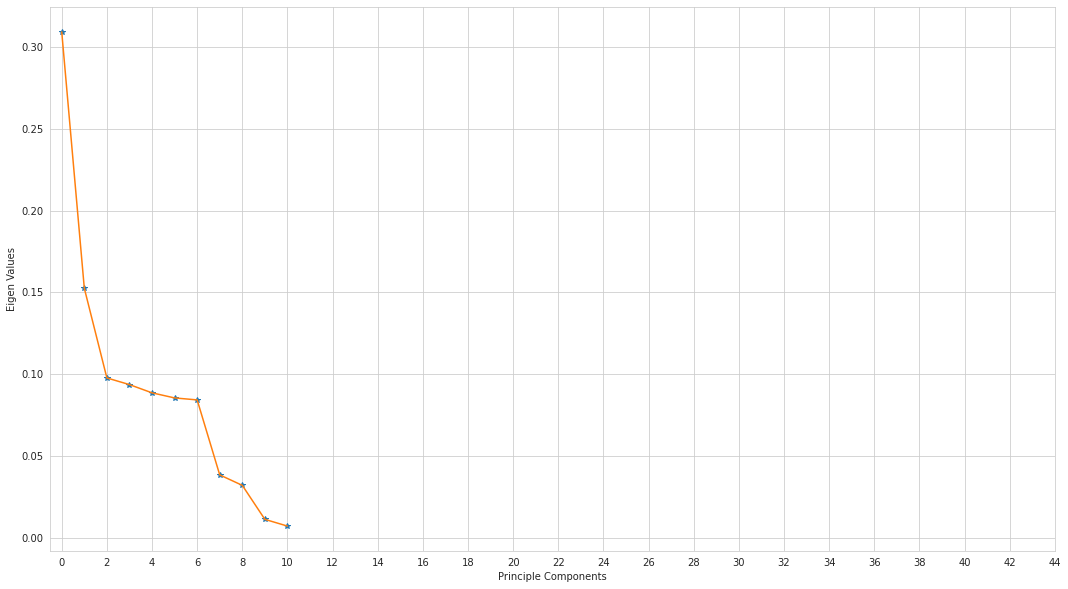

In [35]:
plt.figure(figsize=(18 , 10))

plt.plot(pca.explained_variance_ratio_,'*')
plt.plot(pca.explained_variance_ratio_)
plt.xticks(range(0,45,2))
plt.xlabel('Principle Components')
plt.ylabel('Eigen Values')
plt.show()

PCA Heatmap

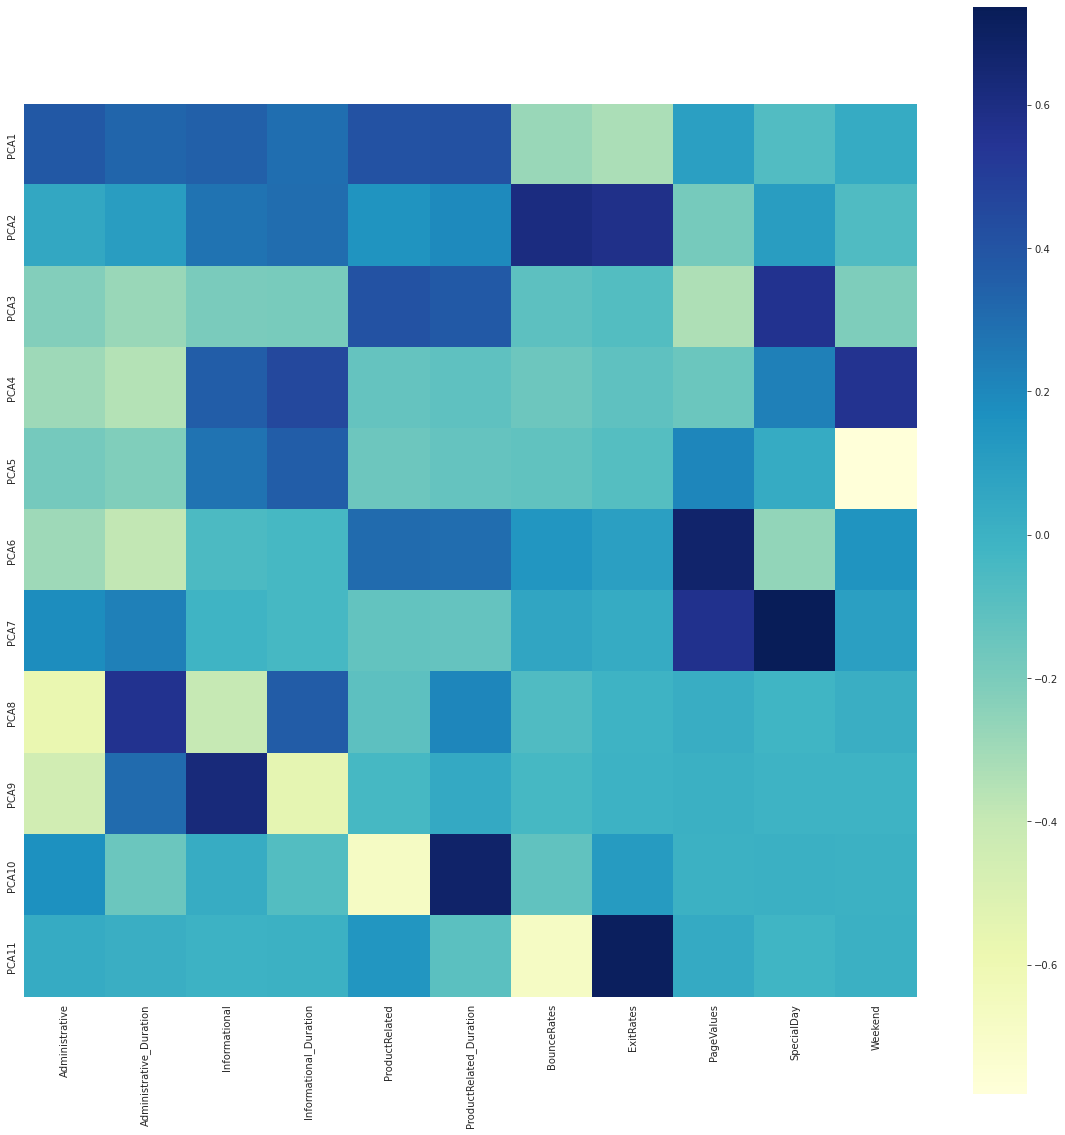

In [36]:
plt.figure(figsize=(20,20))
ax = sns.heatmap(pca.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(X.columns))
ax.set_aspect("equal")
plt.savefig('PCA Heatmap.jpeg',bbox_inches='tight',dpi=150)

Hasil (Visualisasi) PCA (PC1 & PC2)

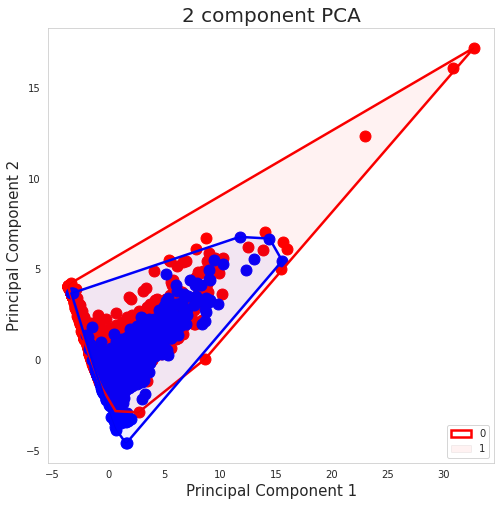

In [37]:
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(Xs_pca)

principalDf = pd.DataFrame(data = X_pca2
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df_final[['Revenue']]], axis = 1)

X=df_final.drop(columns=['Revenue'],axis=1)

from scipy.spatial import ConvexHull

def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Revenue'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 120)
    encircle(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , ec = color, fc="none", linewidth=2.5)
    #shading
    encircle(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , ec = 'k', fc=color, alpha=0.05)
ax.legend(targets)
ax.grid()
plt.savefig('PCA cluster.jpeg',bbox_inches='tight',dpi=150)

Dalam 3D Visual

<ipython-input-38-91b3801d8b18>:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_color=c['Revenue'].astype(np.float)


<Figure size 1440x720 with 0 Axes>

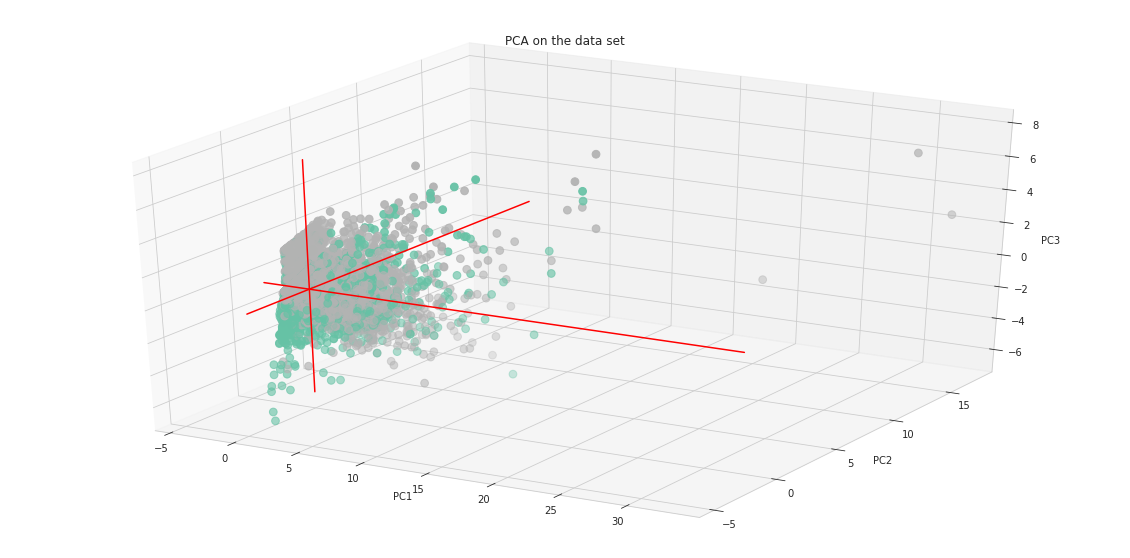

In [38]:
#3D Visual
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
pca.fit(Xs_pca)
c=pd.DataFrame({})
c['Revenue']=pd.Categorical(df_final['Revenue'])
my_color=c['Revenue'].astype(np.float)

fig = plt.figure(figsize=(20, 10))
 
# Store results of PCA in a data frame
result=pd.DataFrame(pca.transform(Xs_pca), columns=['PCA%i' % i for i in range(3)], index=df.index)
 
# Plot initialisation
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=my_color, cmap="Set2_r", s=60)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the data set")
#plt.show()
plt.savefig('PCA scatter 1.jpeg',bbox_inches='tight',dpi=150)


Analisis Data dan Clustering Menggunakan Algoritman EM (Expectation Maximization)

In [39]:
from sklearn.mixture import GaussianMixture
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [40]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [41]:
import numpy as np                              # import numpy
from numpy.linalg import inv                    # for matrix inverse
import matplotlib.pyplot as plt                 # import matplotlib.pyplot for plotting framework
from scipy.stats import multivariate_normal     # for generating pdf

In [42]:
from sklearn import metrics, mixture, cluster, datasets

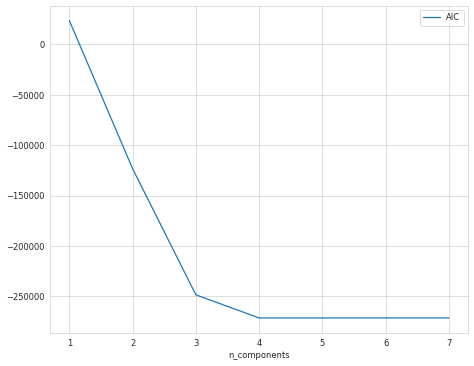

In [43]:
df_em = df_final[['Weekend','Revenue']]
X = df_em.values

GM_n_components = np.arange(1, 8)
GM_models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in GM_n_components]

plt.figure(num=None, figsize=(8, 6), dpi=60, facecolor='w', edgecolor='r')
plt.plot(GM_n_components, [m.aic(X) for m in GM_models], label='AIC')
plt.tight_layout()
plt.legend(loc='best')
plt.xlabel('n_components');

In [44]:
GM_n_classes = 4

GMcluster = mixture.GaussianMixture(n_components=GM_n_classes, covariance_type='full',random_state = 0)
GMcluster_fit = GMcluster.fit(df_em)
GMlabels = GMcluster_fit.predict(df_em)

print('Number of clusters: ' + format(len(np.unique(GMlabels))))

Number of clusters: 4


In [45]:
def ExpectationMaximisation(X, lambdas, probs): 

    while (Some_Condition): # We still haven't talk about this condition
        
        # Calculate posterior probabilities
        # Given current parameters lambdas and probs
        posteriors = Posterior(X, lambdas, probs)
        
        # Calculate new optimal parameters
        # Given current posterior probabilities
        probs = OptimalPi(posteriors)
        lambdas = OptimalLambda(X, posteriors)
    
    return lambdas, probs

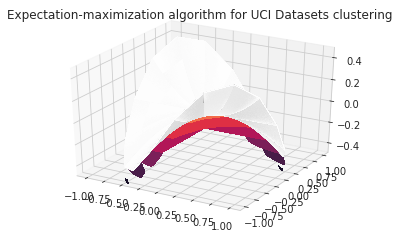

In [46]:
import mpl_toolkits.mplot3d.axes3d as p3
ax = plt.figure().add_subplot(projection='3d')
n_radii = 12330
n_angles = 18
radii = np.linspace(0.125, 1.0, n_radii)
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)[..., np.newaxis]
x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())
z = np.sin(-x*y)

plt.tricontourf(list(x), list(y), list(z))
ax.plot_trisurf(x,y, z, linewidth=0.2, antialiased=True)
plt.title('Expectation-maximization algorithm for UCI Datasets clustering' )
plt.show()
